In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 재시작

In [1]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러오기
df = pd.read_excel('시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
df.head()

In [ ]:
df.info()

In [4]:
# 누락(nan)을 앞에 데이터로 채움
df = df.fillna(method='ffill')

In [ ]:
df

In [5]:
# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]

In [6]:
df_seoul = df_seoul.drop(['전출지별'], axis=1)

In [7]:
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [ ]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
sr_one

In [ ]:
plt.plot(sr_one.index, sr_one.values)

In [ ]:
plt.plot(sr_one)

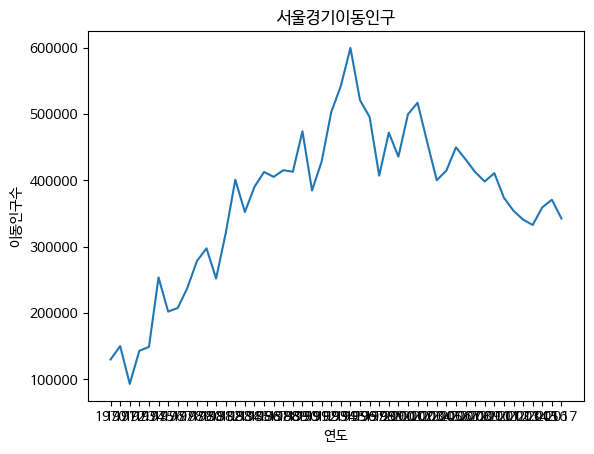

In [10]:
# 차트 제목
plt.title('서울경기이동인구')
plt.plot(sr_one)
plt.xlabel('연도')
plt.ylabel('이동인구수')
plt.show()

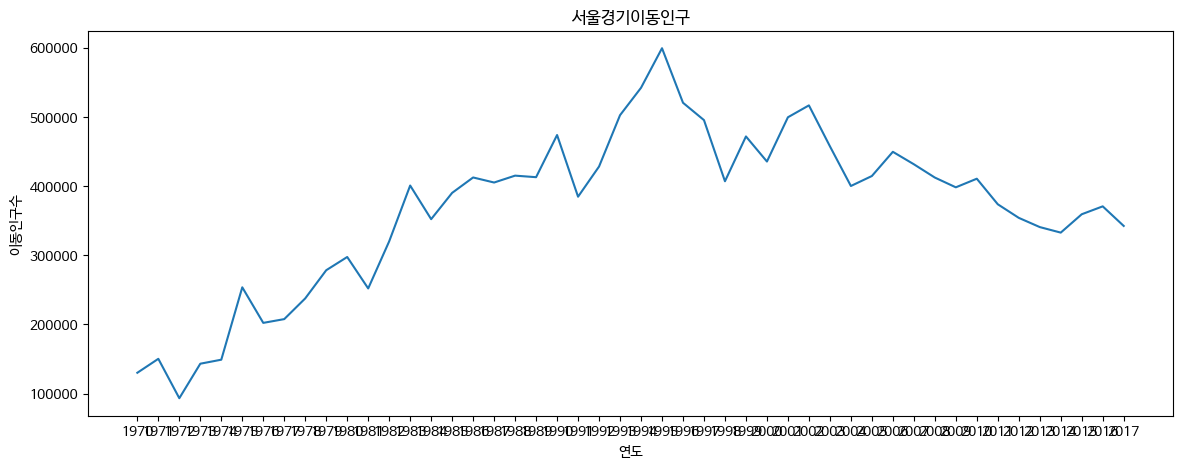

In [11]:
# 그림크기 키우기
plt.figure(figsize=(14, 5))
plt.title('서울경기이동인구')
plt.plot(sr_one)
plt.xlabel('연도')
plt.ylabel('이동인구수')
plt.show()

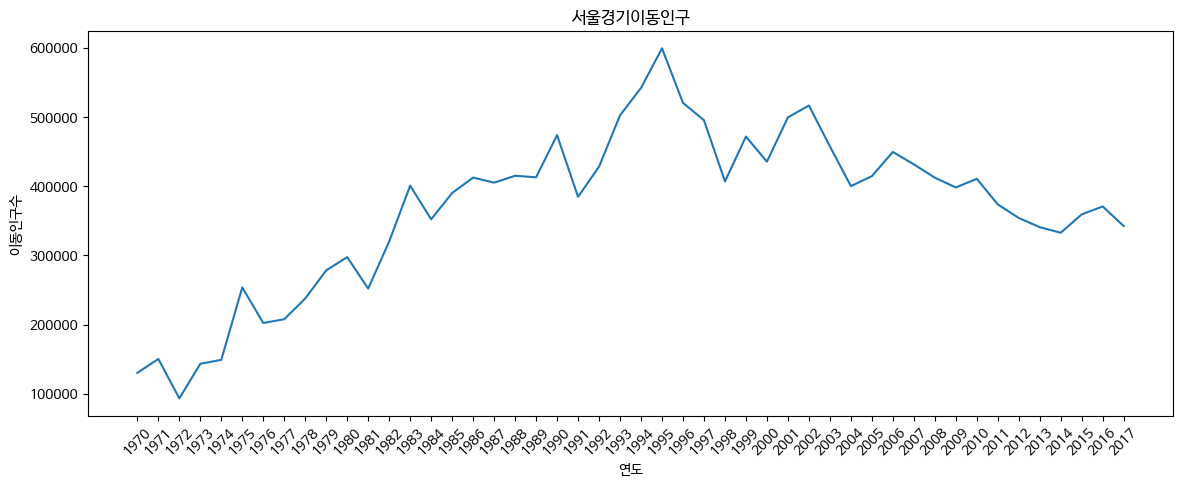

In [13]:
# x축 눈금 라벨을 회전하기
plt.figure(figsize=(14, 5))
plt.title('서울경기이동인구')
plt.plot(sr_one)
plt.xlabel('연도')
plt.xticks(rotation=45)
plt.ylabel('이동인구수')
plt.show()

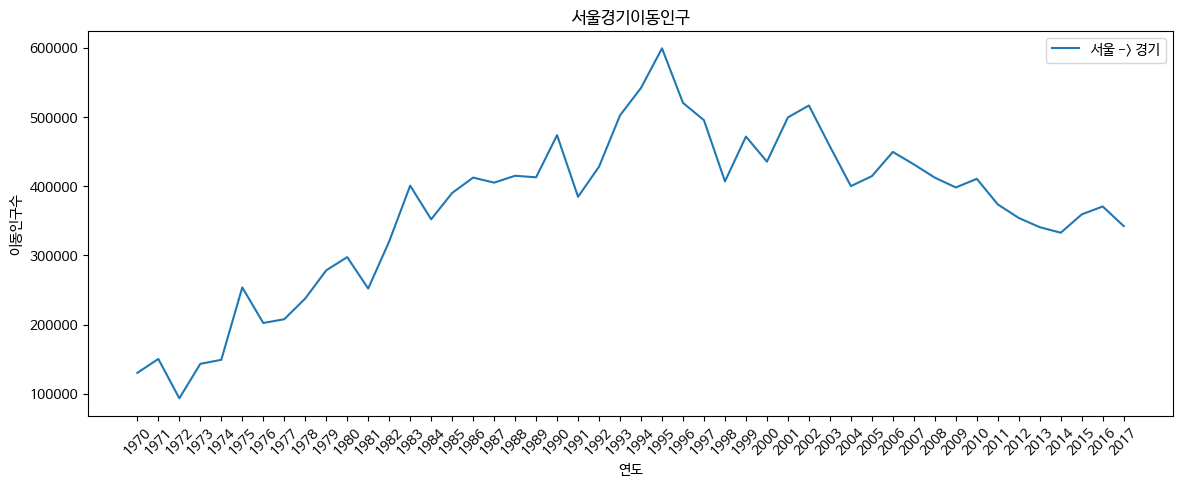

In [16]:
# 범례
plt.figure(figsize=(14, 5))
plt.title('서울경기이동인구')
plt.plot(sr_one)
plt.xlabel('연도')
plt.xticks(rotation=45)
plt.ylabel('이동인구수')
plt.legend(labels=['서울 -> 경기'], loc='best')
plt.show()

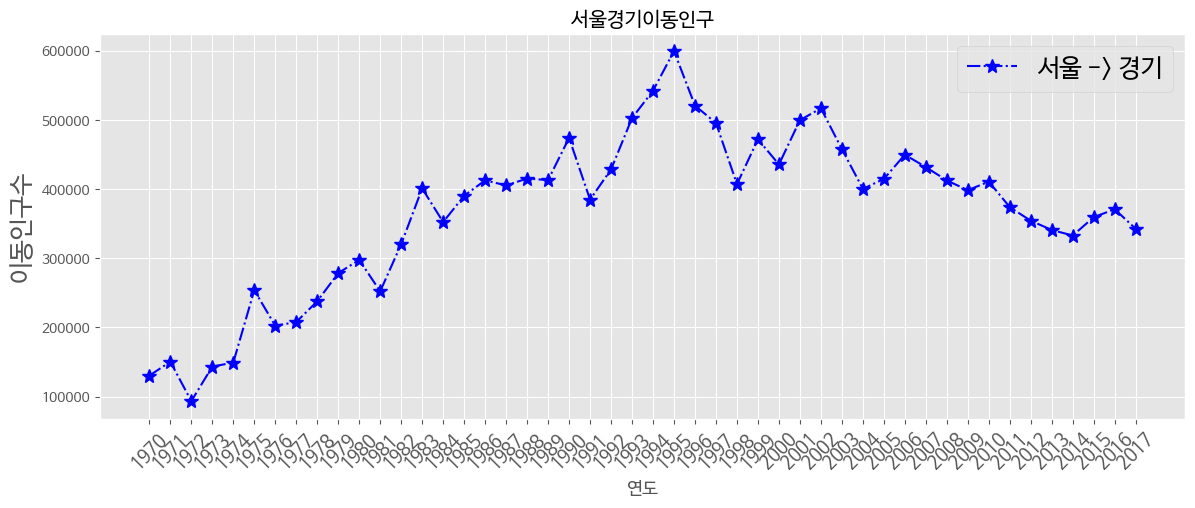

In [41]:
# 스타일 서식 지정
plt.style.use('ggplot')
plt.figure(figsize=(14, 5))
plt.title('서울경기이동인구')
plt.plot(sr_one, marker='*', markersize=10, linestyle='-.',color='blue')
plt.xlabel('연도',size=13)
plt.xticks(rotation=45, size=13)
plt.ylabel('이동인구수', size=18)
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=18)
plt.show()

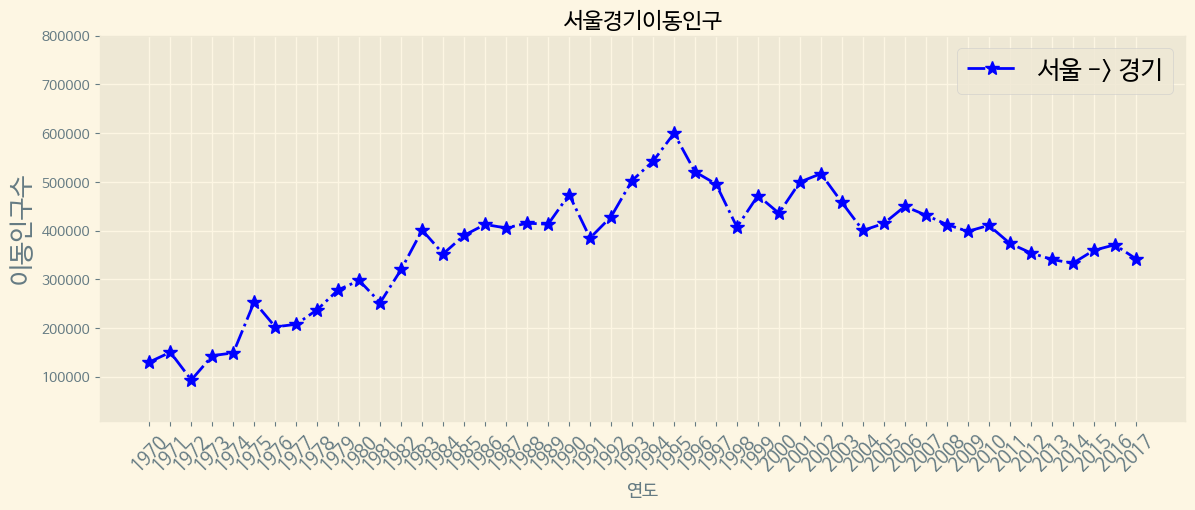

In [45]:
# 스타일 서식 지정
plt.style.use('Solarize_Light2')
plt.figure(figsize=(14, 5))
plt.title('서울경기이동인구')
plt.plot(sr_one, marker='*', markersize=10, linestyle='-.',color='blue')
plt.xlabel('연도',size=13)
plt.xticks(rotation=45, size=13)
plt.ylim(10000, 800000)
plt.ylabel('이동인구수', size=18)
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=18)
plt.show()

In [42]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

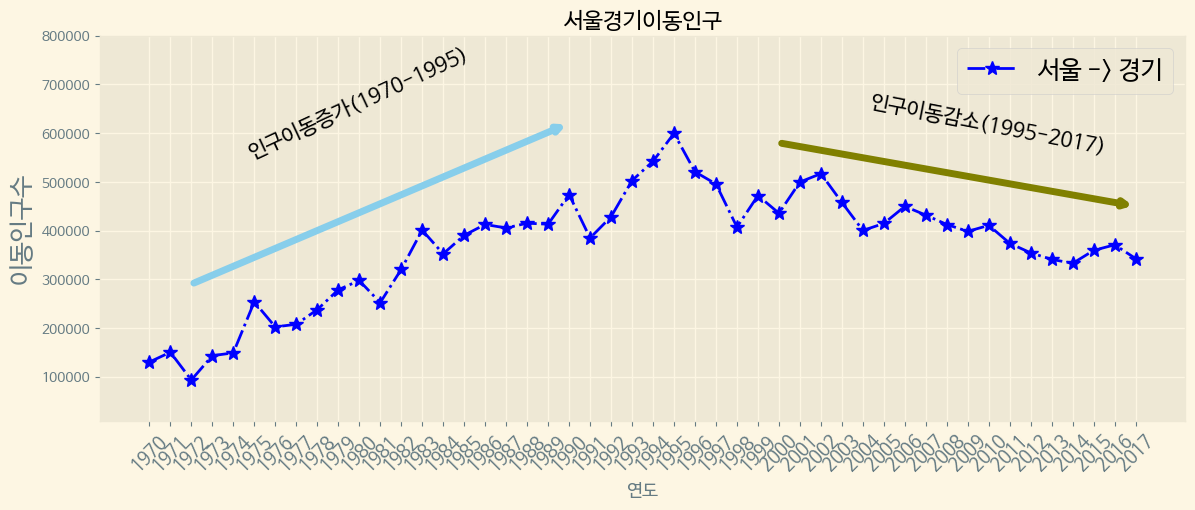

In [49]:
# 스타일 서식 지정
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(14, 5))
plt.title('서울경기이동인구')
plt.plot(sr_one, marker='*', markersize=10, linestyle='-.', color='blue')
plt.xlabel('연도',size=13)
plt.xticks(rotation=45, size=13)
plt.ylim(10000, 800000)
plt.ylabel('이동인구수', size=18)
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=18)
# 주석표시 - 화살표
plt.annotate("", xy=(20, 620000), xytext=(2, 290000), xycoords='data',
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5))
plt.annotate("", xy=(47, 450000), xytext=(30, 580000), xycoords='data',
             arrowprops=dict(arrowstyle='->', color='olive', lw=5))
# 주석표시 텍스트
plt.annotate("인구이동증가(1970-1995)", xy=(10, 550000),
             rotation=25, va='baseline', ha='center', fontsize =15)
plt.annotate("인구이동감소(1995-2017)", xy=(40, 560000),
             rotation= -11, va='baseline', ha='center', fontsize =15)
plt.show()

In [ ]:
# 서울에서 '충청남도', '경상북도', '강원도' 인구데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_1 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]
df_1

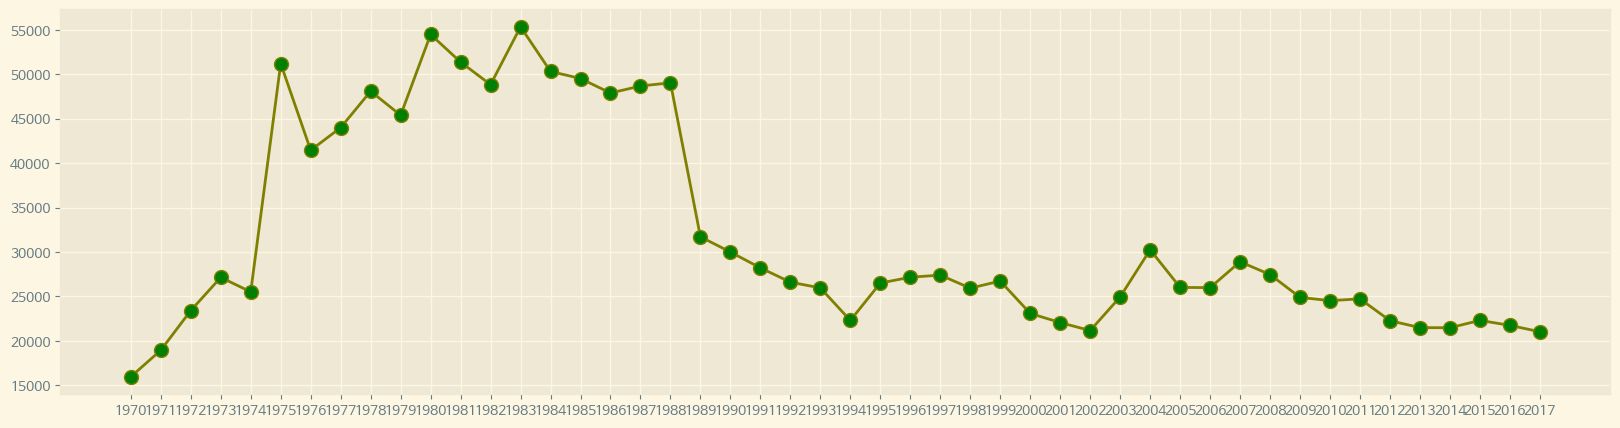

In [51]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(col_years, df_1.loc['충청남도'], marker='o', markerfacecolor='green',
        markersize=10, color='olive', linewidth=2, label = '서울 -> 충남')
# ax.plot(경상북도  / red )
# ax.plot(강원도 / blue)
plt.show()